<a href="https://colab.research.google.com/github/Spin-Chemistry-Labs/radicalpy/blob/187-google-colab-tutorials/examples/tutorials/07_ODMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tutorial 7 - Introduction to ODMR

&copy; Lewis M. Antill, 2025

This tutorial aims introduction the rotating frame approximation and optically-detected magnetic resonance.

In [ ]:
!pip install radicalpy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import radicalpy as rp
from radicalpy import relaxation
from radicalpy.experiments import odmr
from radicalpy.simulation import Basis, State

For ODMR simulations, we employ the rotating frame approximation, which converts a time-dependent Hamiltonian ($\hat{H}(t)$) into a time-independent Hamiltonian ($\hat{H}_{rot}$).
The additional Hamiltonian, $\hat{H}_{rot}$, is as follows,

\begin{align}
\hat{\hat{H}}_{rot} = \omega_{1} \cdot \hat{\mathbf{S}}_{ix} - \omega_{\text{rf}} \cdot \hat{\mathbf{S}}_{iz} - \omega_{\text{rf}} \cdot \sum_{j}\hat{\mathbf{I}}_{jiz},
\end{align}

where $\omega_1$ is the Larmor frequency of the applied $B_1$ magnetic field;
the Coriolis term, $-\omega_{\text{rf}} \cdot \sum_{i}\hat{\mathbf{L}}_{iz}$, is a fictitious interaction that rationalises the motion of the reference frame.
$\hat{\mathbf{L}}$ are the vectors $\hat{\mathbf{S}}$ and $\hat{\mathbf{I}}$ that are the vectors of Cartesian electron and nuclear spin operators, $\{\hat{S}_x, \hat{S}_y, \hat{S}_z\}$ and $\{\hat{I}_x, \hat{I}_y, \hat{I}_z\}$, respectively.

  0%|          | 0/70 [00:00<?, ?it/s]

100%|██████████| 70/70 [00:11<00:00,  6.01it/s]
C:\Users\lewis\AppData\Local\Temp\ipykernel_24620\2468679510.py:64: RuntimeWarning: invalid value encountered in divide
  (results["product_yields"] - results2["product_yields"])
C:\Users\lewis\AppData\Local\Temp\ipykernel_24620\2468679510.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


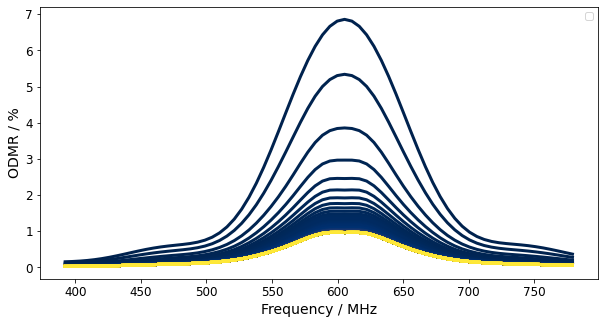

In [2]:
Bmax=28
Bmin=14
dB=0.2
tmax=3e-6
dt=10e-9

flavin = rp.simulation.Molecule.fromdb("flavin_anion", ["N5"])  # , "H27", "H29"])
trp = rp.simulation.Molecule.fromdb("tryptophan_cation", [])  # , "Hbeta1"])
sim = rp.simulation.LiouvilleSimulation([flavin, trp])
time = np.arange(0, tmax, dt)
B0 = 21.6
B1 = 0.3
B1_freq = np.arange(Bmin, Bmax, dB)
D = 0
J = 0
krec = 1.1e7
kesc = 7e6
kSTD = 1e8
kr = 7e7

results = odmr(
    sim,
    init_state=State.TRIPLET,
    obs_state=State.SINGLET,
    time=time,
    D=D,
    J=J,
    B0=B0,
    B1=B1,
    B1_freq=B1_freq,
    kinetics=[
        rp.kinetics.Haberkorn(krec, State.SINGLET),
        rp.kinetics.HaberkornFree(kesc),
    ],
    relaxations=[
        relaxation.SingletTripletDephasing(kSTD),
        relaxation.RandomFields(kr),
    ],
)

B0 = 0

results2 = odmr(
    sim,
    init_state=State.TRIPLET,
    obs_state=State.SINGLET,
    time=time,
    D=D,
    J=J,
    B0=B0,
    B1=B1,
    B1_freq=B1_freq,
    kinetics=[
        rp.kinetics.Haberkorn(krec, State.SINGLET),
        rp.kinetics.HaberkornFree(kesc),
    ],
    relaxations=[
        relaxation.SingletTripletDephasing(kSTD),
        relaxation.RandomFields(kr),
    ],
)

odmr_mfe = (
    (results["product_yields"] - results2["product_yields"])
    / results2["product_yields"]
) * 100

colours = plt.colormaps.get_cmap("cividis").resampled(len(time)).colors

plt.figure(1)
for i in range(0, len(time), 1):
    plt.plot(
        rp.utils.mT_to_MHz(B1_freq),
        odmr_mfe[:, i],
        "-",
        linewidth=3,
        color=colours[i],
    )
plt.xlabel(r"Frequency / MHz", size=14)
plt.ylabel(r"ODMR / %", size=14)
plt.legend()
plt.tick_params(labelsize=12)
plt.gcf().set_size_inches(10, 5)
plt.show()